In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Bài toán: dựa vào chỉ số của petal_width dự đoán giá trị của petal_length

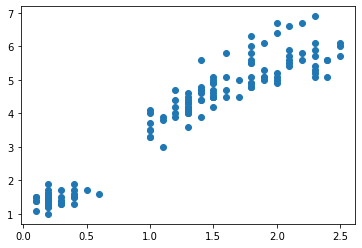

In [4]:
plt.scatter(df['petal_width'], df['petal_length'])
plt.show()

In [5]:
X = df[['petal_width']]
y = df['petal_length']

In [6]:
# lựa chọn thuật toán RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [7]:
# tách dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [8]:
# khởi tạo model
model = RandomForestRegressor(n_estimators = 100) # khởi tạo forest với 100 cây

In [9]:
# huấn luyện với dữ liệu train
model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
#kiểm tra treên train
yhat_train = model.predict(X_train)

In [10]:
# kiểm tra trên dữ liệu test
yhat_test = model.predict(X_test)

In [11]:
#tính R-Score và RMSE
from sklearn.metrics import mean_squared_error

In [13]:
print('R-Score train:', model.score(X_train, y_train))
print('R-Score test:', model.score(X_test, y_test))

R-Score train: 0.9643541553418966
R-Score test: 0.9415266585411591


In [14]:
print('RMSE train:', mean_squared_error(y_train, yhat_train, squared=False))
print('RMSE test:', mean_squared_error(y_test, yhat_test, squared=False))

RMSE train: 0.32946312949747786
RMSE test: 0.43776692382295274


In [15]:
# R-Score của cả train và test đều cao, đồng thời RMSE của train và test đều thấp
# -> model phù hợp với dữ liệu

In [16]:
df_test = pd.DataFrame({
    'Actual': y_test,
    'Prediction': yhat_test
})
df_test.head()

,Actual,Prediction
73,4.7,4.195455
18,1.7,1.359156
118,6.9,5.669367
78,4.5,4.714536
76,4.8,4.622510


In [17]:
# dự đoán trên dữ liệu mới
X_new = [[0.25],
         [1.5],
         [1.8]]
y_new = model.predict(X_new)
y_new

array([1.44081645, 4.71453554, 5.31794819])